In [26]:
import pandas as pd
from prophet import Prophet

# Load your data
df = pd.read_csv(r"C:\Users\71591\Desktop\dataset\Time Series Room Tempera.csv")  
df

,Unnamed: 0,Datetime1,DAYTON_MW,Datetime
0,0,0,20.867,2022-01-04 00:00:00
1,1,1,21.000,2022-01-04 01:00:00
2,2,2,20.867,2022-01-04 02:00:00
3,3,3,20.650,2022-01-04 03:00:00
4,4,4,20.400,2022-01-04 04:00:00
...,...,...,...,...
6671,6671,19,27.350,2022-10-08 23:00:00
6672,6672,20,26.800,2022-10-09 00:00:00
6673,6673,21,26.450,2022-10-09 01:00:00
6674,6674,22,25.900,2022-10-09 02:00:00


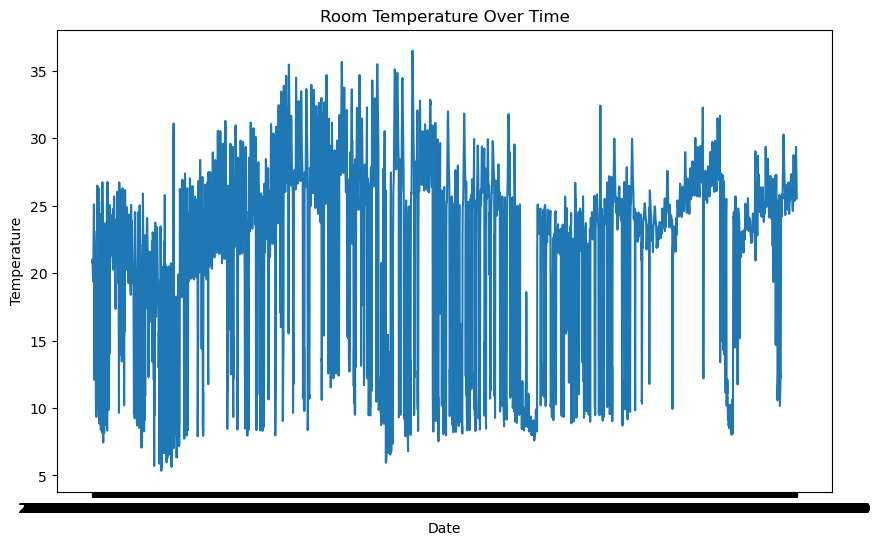

In [27]:
import matplotlib.pyplot as plt

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df['Datetime'], df['DAYTON_MW'])
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Room Temperature Over Time')
plt.show()


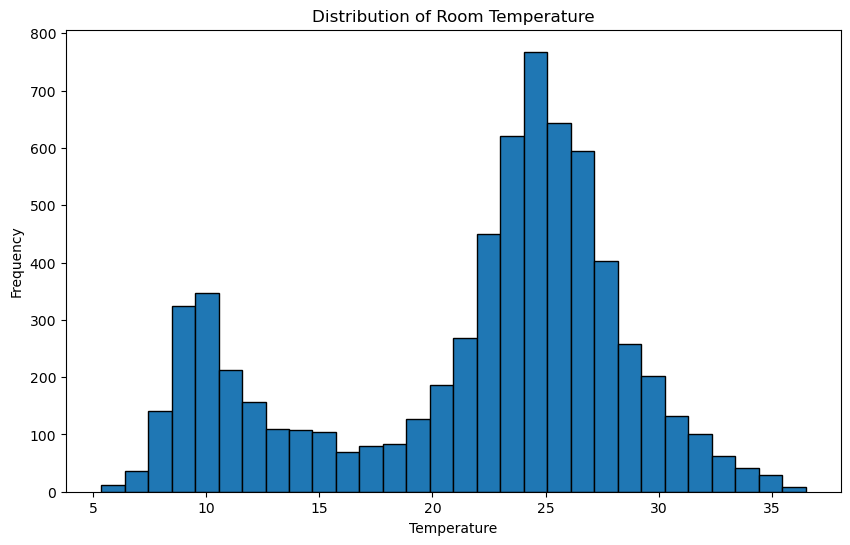

In [28]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['DAYTON_MW'], bins=30, edgecolor='k')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Room Temperature')
plt.show()


In [29]:
24*30

720

<Figure size 1200x800 with 0 Axes>

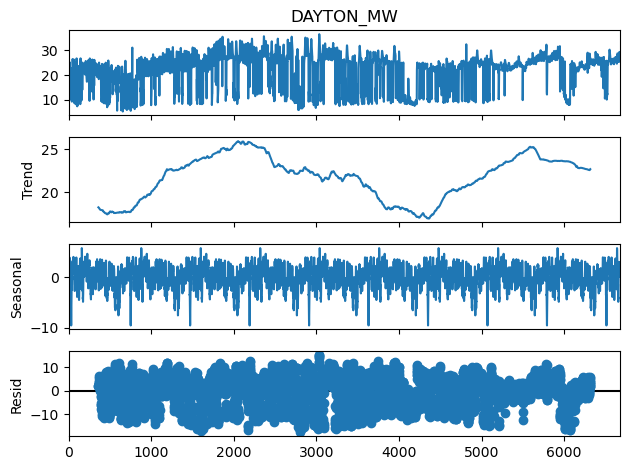

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition with period=24 for daily seasonality
result = seasonal_decompose(df['DAYTON_MW'], model='additive', period=720)

# Plot the decomposition
plt.figure(figsize=(12, 8))
result.plot()
plt.show()

In [31]:
df.columns

Index(['Unnamed: 0', 'Datetime1', 'DAYTON_MW', 'Datetime'], dtype='object')

In [32]:
# Convert 'Datetime' to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Set 'Datetime' as the index
df.set_index('Datetime', inplace=True)
df.drop(columns=['Datetime1'],inplace=True)
df.drop(columns=['Unnamed: 0'],inplace=True)



In [33]:
df

,DAYTON_MW
Datetime,
2022-01-04 00:00:00,20.867
2022-01-04 01:00:00,21.000
2022-01-04 02:00:00,20.867
2022-01-04 03:00:00,20.650
2022-01-04 04:00:00,20.400
...,...
2022-10-08 23:00:00,27.350
2022-10-09 00:00:00,26.800
2022-10-09 01:00:00,26.450


In [34]:
df.describe()

,DAYTON_MW
count,6676.000000
mean,21.736007
std,6.850502
min,5.350000
25%,17.512750
50%,23.900000
75%,26.367000
max,36.500000


In [35]:
train_size = int(0.8 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]


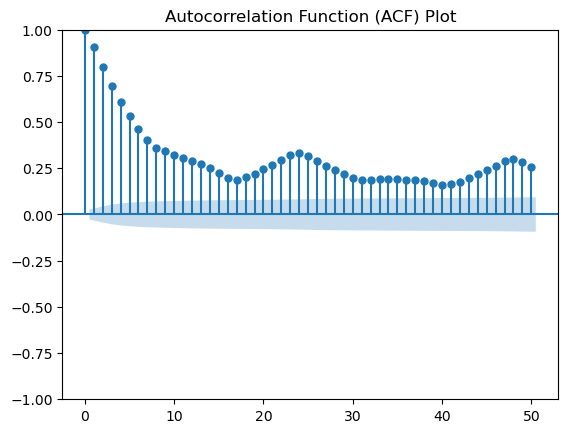

In [36]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plot_acf(train_data['DAYTON_MW'], lags=50)
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()


In [37]:
train_df = train_data.reset_index()[['Datetime', 'DAYTON_MW']]
train_df.columns = ['ds', 'y']

In [38]:
test_df = test_data.reset_index()[['Datetime', 'DAYTON_MW']]
test_df.columns = ['ds', 'y']

In [39]:
test_df

,ds,y
0,2022-08-14 12:00:00,23.700
1,2022-08-14 13:00:00,23.633
2,2022-08-14 14:00:00,23.467
3,2022-08-14 15:00:00,23.200
4,2022-08-14 16:00:00,23.150
...,...,...
1331,2022-10-08 23:00:00,27.350
1332,2022-10-09 00:00:00,26.800
1333,2022-10-09 01:00:00,26.450
1334,2022-10-09 02:00:00,25.900


In [144]:
from prophet import Prophet



# Initialize the Prophet model
model = Prophet()

# Add weekly seasonality with custom parameters if needed
model.add_seasonality(name='weekly', period=7, fourier_order=3)
model.add_seasonality(name='daily', period=1, fourier_order=3)
#model.add_seasonality(name='yearly', period=365, fourier_order=3)

# Fit the model
model.fit(train_df)


14:53:22 - cmdstanpy - INFO - Chain [1] start processing
14:53:22 - cmdstanpy - INFO - Chain [1] done processing


In [177]:
# Create future dataframe for 365 hours into the future
future = model.make_future_dataframe(periods=len(test_df), freq='H')


In [178]:
# Make predictions using the future dataframe
forecast = model.predict(future)


In [179]:
# Review the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


                      ds       yhat  yhat_lower  yhat_upper
6671 2022-10-08 23:00:00  30.445821   21.986188   39.038230
6672 2022-10-09 00:00:00  29.835416   21.595648   38.588759
6673 2022-10-09 01:00:00  29.183371   20.660120   37.748965
6674 2022-10-09 02:00:00  28.578524   19.767268   37.455413
6675 2022-10-09 03:00:00  28.095681   18.809057   37.270613


C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an nda

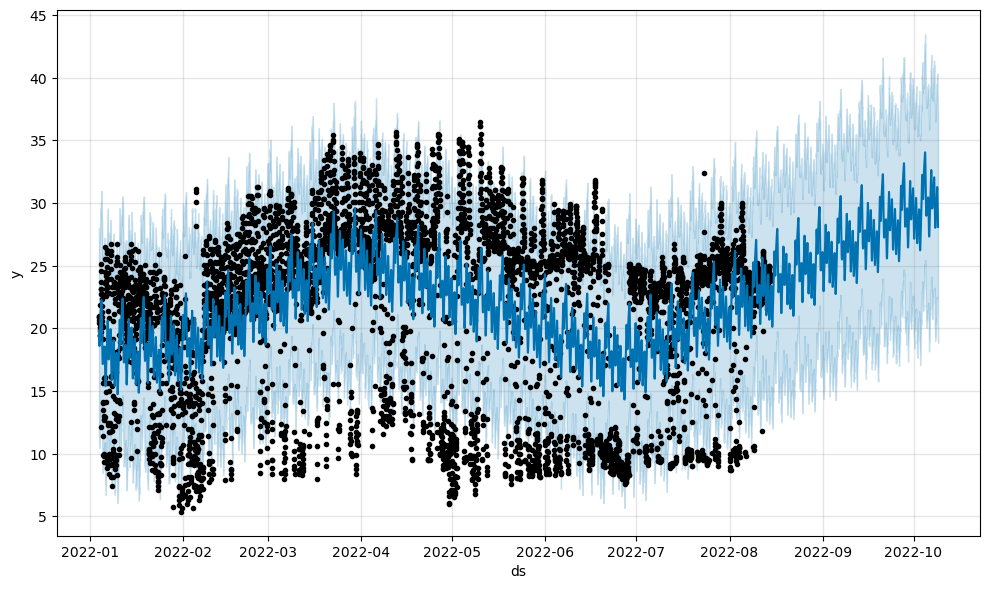

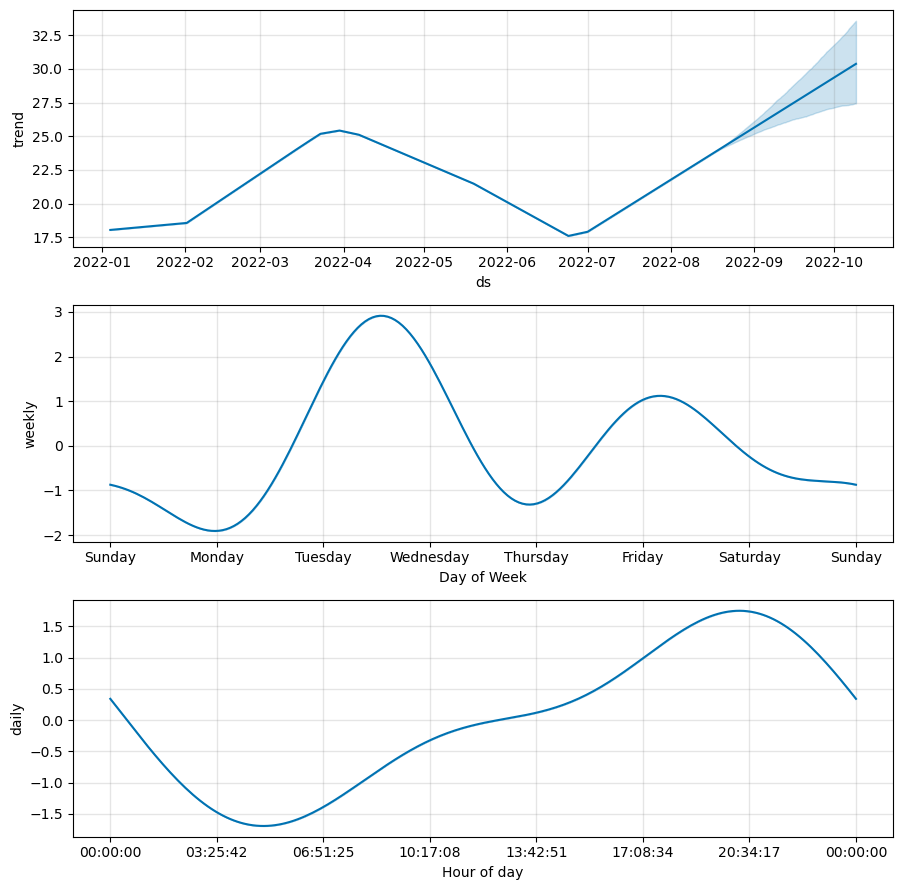

In [180]:
# Plot the forecast
fig1 = model.plot(forecast)

# Plot the forecast components 
fig2 = model.plot_components(forecast)


In [181]:
# Create future dataframe for the test period
future_test = test_df[['ds']].copy()

# Make predictions
forecast_test = model.predict(future_test)

# Extract predictions
y_pred = forecast_test['yhat'].values
y_test = test_df['y'].values

In [182]:
len(forecast_test)

1336

In [183]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 4.08
Root Mean Squared Error: 6.06
R-squared: -0.75


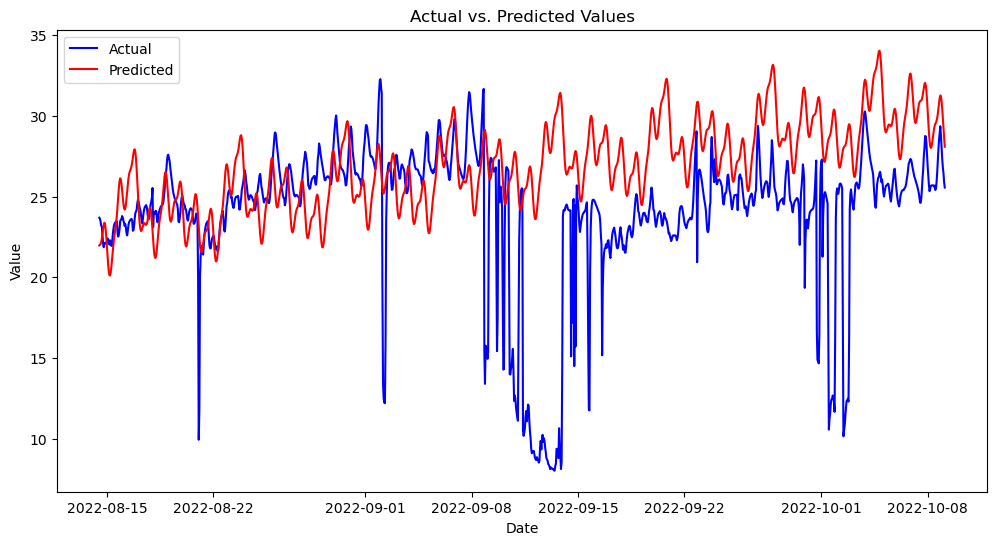

In [184]:
import matplotlib.pyplot as plt

# Create a DataFrame for plotting
results_df = test_data.copy()
results_df['Predicted'] = y_pred

plt.figure(figsize=(12, 6))
plt.plot(results_df.index, results_df['DAYTON_MW'], label='Actual', color='blue')
plt.plot(results_df.index, results_df['Predicted'], label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


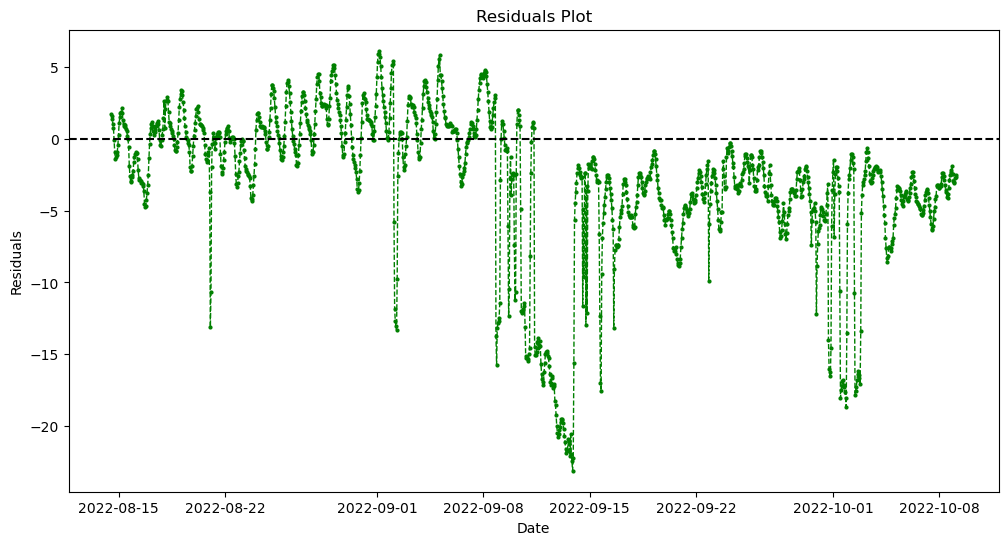

In [185]:
# Calculate residuals
results_df['Residuals'] = results_df['DAYTON_MW'] - results_df['Predicted']

plt.figure(figsize=(12, 6))
plt.plot(results_df.index, results_df['Residuals'], color='green', marker='o', linestyle='dashed', linewidth=1, markersize=2)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


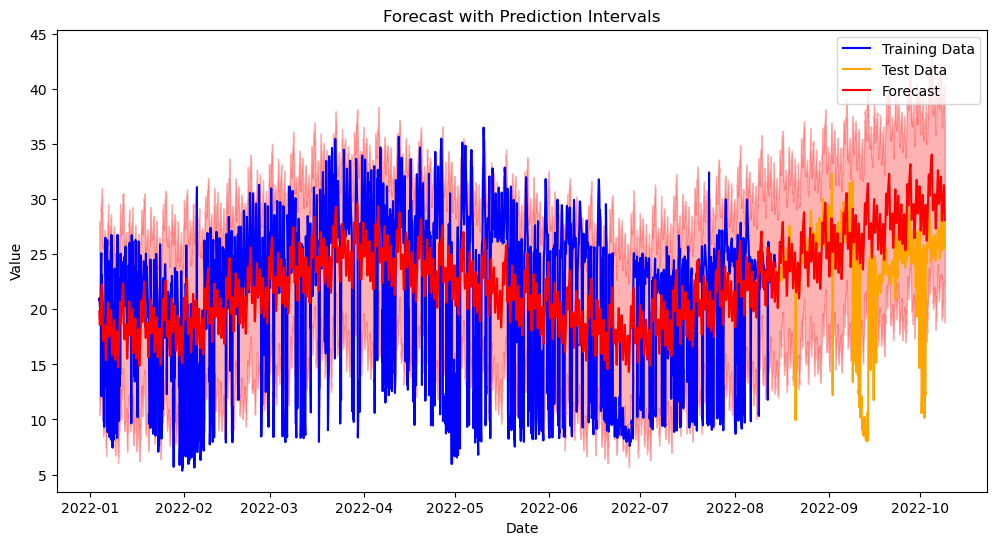

In [186]:
import matplotlib.pyplot as plt

# Assume forecast is the DataFrame obtained from Prophet's predict method
plt.figure(figsize=(12, 6))

# Plot the observed data
plt.plot(train_df['ds'], train_df['y'], label='Training Data', color='blue')
plt.plot(test_df['ds'], test_df['y'], label='Test Data', color='orange')

# Plot the forecasted data
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Forecast with Prediction Intervals')
plt.legend()
plt.show()


In [189]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate MAE
mae = mean_absolute_error(df['DAYTON_MW'], forecast['yhat'])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(df['DAYTON_MW'], forecast['yhat']))

# Calculate R-squared
r2 = r2_score(df['DAYTON_MW'], forecast['yhat'])

# Print the evaluation metrics
print(f'Mean Absolute Error: {mae:.3f}')
print(f'Root Mean Squared Error: {rmse:.3f}')
print(f'R-squared: {r2:.3f}')

Mean Absolute Error: 5.075
Root Mean Squared Error: 6.386
R-squared: 0.131
